In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define SIR model
def sir_model(t, y, beta, gamma):
    S, I, R = y
    N = S + I + R
    dSdt = -beta(t) * S * I / N
    dIdt = beta(t) * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Define sigmoid function for beta
def beta_func(t, beta_0, beta_1, k, m):
    return beta_0 + (beta_1 - beta_0) / (1 + np.exp(-k * (t - m)))

In [9]:
true_params = {
    'rt_0': 1.4,
    'rt_1': 3.,
    'midpoint': 100.,
    'k': 0.1,
    'n_t': 365,
    't_I': 4.,
    'N': 100_000.,
    'S0': 99_900.,
    'I0': 100.,
}

y0 = [99_900, 100, 0]
tspan = [0, 365]
t_eval = np.arange(tspan[0], tspan[1])
gamma = 0.25
k = 0.1
m = 100
beta_0_range = np.linspace(0, 1, 100)
beta_1_range = np.linspace(0, 1, 100)

for beta_0 in tqdm(beta_0_range):
    for beta_1 in beta_1_range:
        sol = solve_ivp(lambda t, y: sir_model(t, y, lambda t: beta_func(t, beta_0, beta_1, k, m), gamma), tspan, y0, t_eval=t_eval)

 22%|███████████████████▏                                                                   | 22/100 [00:08<00:30,  2.58it/s]


KeyboardInterrupt: 

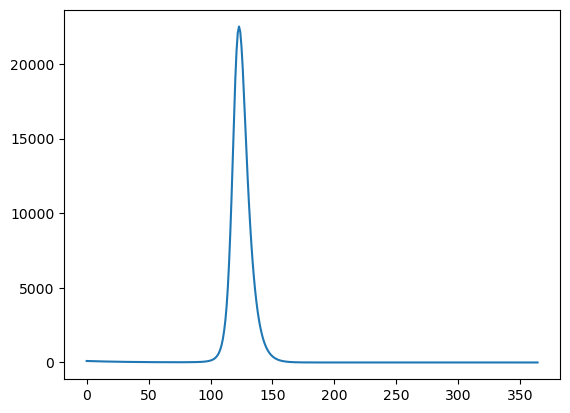

In [16]:
plt.plot(sol.y[1])